## List-1 Models

In [1]:
import numpy as np

# Sigmoid activation function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_epochs=10):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def initialize_parameters(self, num_features, num_classes):
        self.weights = np.zeros((num_features, num_classes))
        self.biases = np.zeros(num_classes)

    def softmax(self, scores):
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # print(y_pred)
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)


    def gradient_descent(self, X, y_true, y_pred):
        num_samples = len(y_true)
        dw = np.dot(X.T, (y_pred - y_true)) / num_samples
        db = np.sum(y_pred - y_true) / num_samples
        return dw, db

    def train(self, X_train, y_train, X_valid, y_valid):
        num_features = X_train.shape[1]
        num_classes = 6
        self.initialize_parameters(num_features, num_classes)
        # print(num_classes)
        for epoch in range(self.num_epochs):
            scores = np.dot(X_train, self.weights) + self.biases
            y_pred = self.softmax(scores)
            # print(y_pred)
            # print(y_train)
            # Compute loss
            loss = self.cross_entropy_loss(y_train, y_pred)

            dw, db = self.gradient_descent(X_train, y_train, y_pred)

            self.weights -= self.learning_rate * dw
            self.biases -= self.learning_rate * db

            valid_scores = np.dot(X_valid, self.weights) + self.biases
            valid_preds = self.softmax(valid_scores)
            valid_loss = self.cross_entropy_loss(y_valid, valid_preds)
            # print(np.argmax(valid_preds, axis=1))
            # print(valid_preds)
            y_true=[]
            for i in y_valid:
                for j in range(len(i)):
                    if(i[j]==1): 
                        y_true.append(j)
                        break
            # print(y_valid)
            accuracy = np.mean(np.argmax(valid_preds, axis=1) == y_true)

            print(f"Epoch {epoch + 1}/{self.num_epochs}: Loss={loss:.4f}, Valid Loss={valid_loss:.4f}, Accuracy={accuracy:.4f}")

    def fit(self, X_train, y_train):
        num_features = X_train.shape[1]
        num_classes = 6
        self.initialize_parameters(num_features, num_classes)

        for epoch in range(self.num_epochs):
            scores = np.dot(X_train, self.weights) + self.biases
            y_pred = self.softmax(scores)

            loss = self.cross_entropy_loss(y_train, y_pred)

            dw, db = self.gradient_descent(X_train, y_train, y_pred)

            self.weights -= self.learning_rate * dw
            self.biases -= self.learning_rate * db

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.biases
        # print(scores)
        return np.argmax(scores, axis=1)


# Linear Regression
class LinearRegression:
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add a bias term (intercept)
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add a bias term (intercept)
        return X.dot(self.theta)


In [2]:
class MLPClassifier:
    def __init__(self, input_size=12, hidden_layers=1, num_neurons=64, output_size=6, learning_rate=0.01, activation='sigmoid', optimizer='sgd'):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.num_neurons = num_neurons
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights, self.biases = self.initialize_weights()

        self.activation = self.get_activation_function(activation)

        self.optimizer_choice = optimizer 

    def initialize_weights(self):
        weights = [np.random.randn(self.input_size, self.num_neurons) * np.sqrt(1.0 / self.input_size)]
        biases = [np.zeros((1, self.num_neurons))]

        for _ in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.num_neurons, self.num_neurons) * np.sqrt(1.0 / self.num_neurons))
            biases.append(np.zeros((1, self.num_neurons)))

        weights.append(np.random.randn(self.num_neurons, self.output_size) * np.sqrt(1.0 / self.num_neurons))
        biases.append(np.zeros((1, self.output_size)))

        return weights, biases
    
    def forward(self, x):
        activations = []
        layer_input = x

        for i in range(self.hidden_layers):
            layer_output = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_output = self.activation(layer_output)
            activations.append(layer_output)
            layer_input = layer_output

        output = np.dot(layer_input, self.weights[-1]) + self.biases[-1]
        return output, activations

    def backward(self, x, y, output, activations):
        gradients = []
        num_samples = x.shape[0]

        delta = output - y

        for i in range(self.hidden_layers - 1, -1, -1):
            dw = np.dot(activations[i].T, delta) / num_samples
            db = np.sum(delta, axis=0) / num_samples
            gradients.append({'dw': dw, 'db': db})

            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * (activations[i] * (1 - activations[i]))

        return gradients

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)

    def get_activation_function(self, activation):
        if activation == 'sigmoid':
            return self.sigmoid
        elif activation == 'relu':
            return self.relu
        elif activation == 'tanh':
            return self.tanh
        else:
            return

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)

    def getoptimizer(self, gradients):
        for i in range(len(self.weights)):
            self.weights[0][i][0] -= self.learning_rate * gradients[0]['dw'][0][0]
            self.biases[i] -= self.learning_rate * gradients[0]['db'][0]
    
    def train(self, x_train, y_train, x_val, y_val, batch_size=32, num_epochs=100):
        if self.optimizer_choice == 'sgd':
            for epoch in range(num_epochs):
                for i in range(len(x_train)):
                    x_batch = x_train[i]
                    y_batch = y_train[i]

                    output, activations = self.forward(x_batch)
                    loss = self.cross_entropy_loss(y_batch, self.softmax(output))
                    gradients = self.backward(x_batch, y_batch, self.softmax(output), activations)
                    self.getoptimizer(gradients)
                valid_output, _ = self.forward(x_val)
                valid_pred = self.softmax(valid_output)
                accuracy = np.mean(np.argmax(valid_pred, axis=1) == np.argmax(y_val, axis=1))
                loss = self.cross_entropy_loss(y_val, valid_pred)

                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}, Accuracy={accuracy:.4f}")
        elif self.optimizer_choice == 'bgd':
            for epoch in range(num_epochs):
                output, activations = self.forward(x_train)
                loss = self.cross_entropy_loss(y_train, self.softmax(output))
                gradients = self.backward(x_train, y_train, self.softmax(output), activations)
                self.getoptimizer(gradients)
                valid_output, _ = self.forward(x_val)
                valid_pred = self.softmax(valid_output)
                accuracy = np.mean(np.argmax(valid_pred, axis=1) == np.argmax(y_val, axis=1))
                loss = self.cross_entropy_loss(y_val, valid_pred)

                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}, Accuracy={accuracy:.4f}")
        elif self.optimizer_choice == 'mbgd':
            for epoch in range(num_epochs):
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]

                    output, activations = self.forward(x_batch)
                    loss = self.cross_entropy_loss(y_batch, self.softmax(output))
                    gradients = self.backward(x_batch, y_batch, self.softmax(output), activations)
                    self.getoptimizer(gradients)
                valid_output, _ = self.forward(x_val)
                valid_pred = self.softmax(valid_output)
                accuracy = np.mean(np.argmax(valid_pred, axis=1) == np.argmax(y_val, axis=1))
                loss = self.cross_entropy_loss(y_val, valid_pred)

                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}, Accuracy={accuracy:.4f}")
        else:
            return
    def fit(self, x_train, y_train, batch_size=32, num_epochs=10):
        num_samples = len(x_train)

        if self.optimizer_choice == 'sgd':
            for epoch in range(num_epochs):
                for i in range(0, num_samples, batch_size):
                    x_batch = x_train[i:i + batch_size]
                    y_batch = y_train[i:i + batch_size]

                    output, activations = self.forward(x_batch)
                    loss = self.cross_entropy_loss(y_batch, self.softmax(output))
                    gradients = self.backward(x_batch, y_batch, self.softmax(output), activations)
                    self.getoptimizer(gradients)

                    if i + batch_size >= num_samples:
                        valid_output, _ = self.forward(x_batch)
                        valid_pred = self.softmax(valid_output)
                        accuracy = np.mean(np.argmax(valid_pred, axis=1) == np.argmax(y_batch, axis=1))
                        val_loss = self.cross_entropy_loss(y_batch, valid_pred)

        else:
            for epoch in range(num_epochs):
                output, activations = self.forward(x_train)
                loss = self.cross_entropy_loss(y_train, self.softmax(output))
                gradients = self.backward(x_train, y_train, self.softmax(output), activations)
                self.getoptimizer(gradients)
                
    def predict(self, x):
        output, _ = self.forward(x)
        # print(np.argmax(self.softmax(output), axis=1))
        # print(np.argmax(output, axis=1))
        return np.argmax(self.softmax(output), axis=1)

In [3]:
class MLPRegressor:
    def __init__(self, input_size=13, hidden_layers=1, num_neurons=32, learning_rate=0.01, activation='sigmoid', optimizer='sgd'):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate

        self.weights, self.biases = self.initialize_weights()

        self.activation = self.get_activation_function(activation)

        self.optimizer_choice = optimizer

    def initialize_weights(self):
        weights = [np.random.randn(self.input_size, self.num_neurons) * np.sqrt(1.0 / self.input_size)]
        biases = [np.zeros((1, self.num_neurons))]

        for _ in range(self.hidden_layers - 1):
            weights.append(np.random.randn(self.num_neurons, self.num_neurons) * np.sqrt(1.0 / self.num_neurons))
            biases.append(np.zeros((1, self.num_neurons)))

        weights.append(np.random.randn(self.num_neurons, 1) * np.sqrt(1.0 / self.num_neurons))
        biases.append(np.zeros((1, 1)))

        return weights, biases
    
    def forward(self, x):
        activations = []
        layer_input = x

        for i in range(self.hidden_layers):
            layer_output = np.dot(layer_input, self.weights[i]) + self.biases[i]
            layer_output = self.activation(layer_output)
            activations.append(layer_output)
            layer_input = layer_output
        # print(layer_output)
        output = np.dot(layer_input, self.weights[-1]) + self.biases[-1]
        return output, activations

    def backward(self, x, y, output, activations):
        gradients = []
        num_samples = x.shape[0]

        delta = output - y

        for i in range(self.hidden_layers - 1, -1, -1):
            dw = np.dot(activations[i].T, delta) / num_samples
            db = np.sum(delta, axis=0) / num_samples
            gradients.append({'dw': dw, 'db': db})

            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * (activations[i - 1] * (1 - activations[i - 1]))

        return gradients


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)
    
    def get_optimizer(self, gradients):
        for i in range(len(self.weights)):
            self.weights[0][i][0] -= self.learning_rate * gradients[0]['dw'][0][0]
            self.biases[i] -= self.learning_rate * gradients[0]['db'][0]

    def get_activation_function(self, activation):
        if activation == 'sigmoid':
            return self.sigmoid
        elif activation == 'relu':
            return self.relu
        elif activation == 'tanh':
            return self.tanh
        else:
            return

    def train(self, x_train, y_train, x_val, y_val, batch_size=32, num_epochs=100):
        if self.optimizer_choice == 'sgd':
            for epoch in range(num_epochs):
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]

                    output, activations = self.forward(x_batch)
                    loss = self.mean_squared_error(y_batch, output)
                    gradients = self.backward(x_batch, y_batch, output, activations)
                    self.get_optimizer(gradients)

                valid_output, _ = self.forward(x_val)
                loss = self.mean_squared_error(y_val, valid_output)
                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}")
                
        elif self.optimizer_choice == 'bgd':
            for epoch in range(num_epochs):
                output, activations = self.forward(x_train)
                loss = self.mean_squared_error(y_train, output)
                gradients = self.backward(x_train, y_train, output, activations)
                self.get_optimizer(gradients)
                valid_output, _ = self.forward(x_val)
                loss = self.mean_squared_error(y_val, valid_output)
                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}")
                
        elif self.optimizer_choice == 'mbgd':
            for epoch in range(num_epochs):
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]
                    output, activations = self.forward(x_batch)
                    loss = self.mean_squared_error(y_batch, output)
                    gradients = self.backward(x_batch, y_batch, output, activations)
                    self.get_optimizer(gradients)

                valid_output, _ = self.forward(x_val)
                loss = self.mean_squared_error(y_val, valid_output)
                # print(f"Epoch {epoch + 1}/{num_epochs}: Loss={loss:.4f}")

    def mean_squared_error(self, y_true, y_pred):
        n = len(y_true)
        return np.sum((y_true - y_pred) ** 2) / n

    def root_mean_squared_error(self, y_true, y_pred):
        mse = self.mean_squared_error(y_true, y_pred)
        return np.sqrt(mse)

    def r_squared_error(self, y_true, y_pred):
        y_mean = np.mean(y_true)
        ssr = np.sum((y_true - y_pred) ** 2)
        sst = np.sum((y_true - y_mean) ** 2)
        return 1 - (ssr / sst)

    def fit(self, x_train, y_train, batch_size=32, num_epochs=20):
        num_samples = len(x_train)

        if self.optimizer_choice == 'sgd':
            for epoch in range(num_epochs):
                for i in range(0, num_samples, batch_size):
                    x_batch = x_train[i:i + batch_size]
                    y_batch = y_train[i:i + batch_size]

                    output, activations = self.forward(x_batch)
                    loss = self.mean_squared_error(y_batch, output)
                    gradients = self.backward(x_batch, y_batch, output, activations)
                    self.get_optimizer(gradients)

                    if i + batch_size >= num_samples:
                        valid_output, _ = self.forward(x_batch)
                        val_loss = self.mean_squared_error(y_batch, valid_output)
        else:
            for epoch in range(num_epochs):
                output, activations = self.forward(x_train)
                loss = self.mean_squared_error(y_train, output)
                gradients = self.backward(x_train, y_train, output, activations)
                self.get_optimizer(gradients)
    def predict(self, x):
        output, _ = self.forward(x)
        return output


## Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def get_classifier_data():
    data=pd.read_csv("WineQT.csv")

    values=[[] for i in data]
    keys=[key for key in data]

    for i in range(len(data)):
        for key in range(len(keys)):
            values[key].append(data[keys[key]][i])

    X,Y=[],[]

    for i in range(len(data)):
        xvals=[]
        yvals=[ 0 for i in range(6)]
        for key in keys:
            if key == "quality":
                yvals[data[key][i]-3]=1
            else:
                xvals.append(data[key][i])
        X.append(xvals)
        Y.append(yvals)
    # Y=np.array(Y)
    # print(y)
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    scaler = MinMaxScaler()
    X= scaler.fit_transform(X)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    x_train,x_oth,y_train,y_oth=train_test_split(X,Y,test_size=0.3,random_state=42)
    x_val,x_test,y_val,y_test=train_test_split(x_oth,y_oth,test_size=0.1,random_state=42)
    y_train=np.array(y_train)
    return x_train,y_train,x_test,y_test,x_val,y_val

a,d,b,w,s,f=get_classifier_data()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def get_regressor_data():
    data=pd.read_csv("HousingData.csv")

    keys=[key for key in data]
    column_means = data.mean()

    data = data.fillna(column_means)

    imputer = SimpleImputer(strategy='mean')
    data = imputer.fit_transform(data)
    values=[[] for i in range(len(data[0]))]
    # print(keys)

    for i in data:
        for j in range(len(i)):
            values[j].append(i[j])

    X=data[:,:-1]
    Y=data[:,-1]
    Y=Y.reshape(-1,1)

    scaler = MinMaxScaler()
    X= scaler.fit_transform(X)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    x_train,x_oth,y_train,y_oth=train_test_split(X,Y,test_size=0.3,random_state=42)
    x_val,x_test,y_val,y_test=train_test_split(x_oth,y_oth,test_size=0.1,random_state=42)

    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    y_val=y_val.reshape(-1,1)
    
    return x_train,y_train,x_test,y_test,x_val,y_val

# Bagging

In [8]:
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

class CustomBaggingRegressor:
    def __init__(self, base_estimator, n_estimators, fraction_samples, bootstrap, voting, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.fraction_samples = fraction_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        np.random.seed(self.random_state)

        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), size=int(self.fraction_samples * len(X)), replace=self.bootstrap)
            X_subset, y_subset = X[indices], y[indices]

            model = self.base_estimator()
            model.fit(X_subset, y_subset)
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])

        # if self.voting == 'hard':
        #     final_predictions = np.round(np.mean(predictions, axis=0))
        # elif self.voting == 'soft':
        #     final_predictions = np.mean(predictions, axis=0)
        if self.voting == 'hard':
            final_predictions = np.round(np.mean(predictions, axis=0))
        elif self.voting == 'soft':
            final_predictions = np.mean(predictions, axis=0)

        return final_predictions


class CustomBaggingClassifier:
    def __init__(self, base_estimator, n_estimators, fraction_samples, bootstrap, voting, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.fraction_samples = fraction_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        np.random.seed(self.random_state)

        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), size=int(self.fraction_samples * len(X)), replace=self.bootstrap)
            X_subset, y_subset = X[indices], y[indices]

            model = self.base_estimator()
            model.fit(X_subset, y_subset)
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])

        if self.voting == 'hard':
            final_predictions = np.round(np.mean(predictions, axis=0))
        elif self.voting == 'soft':
            final_predictions = np.mean(predictions, axis=0)

        return final_predictions


## Regressor

In [11]:
# Example usage for regression
from sklearn.tree import DecisionTreeRegressor

# X_reg = np.random.rand(100, 1)
# y_reg = 3 * X_reg.squeeze() + np.random.normal(scale=0.1, size=100)

x_train,y_train,x_test,y_test,x_val,y_val = get_regressor_data()

reg_models = []

model=MLPRegressor()
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for num_estimators in [10, 50, 100, 200]:
        for bootstrap in [True, False]:
            for voting in ['hard', 'soft']:
                bagging_reg = CustomBaggingRegressor(base_estimator=MLPRegressor, n_estimators=num_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting, random_state=42)
                bagging_reg.fit(x_train, y_train)
                predictions_reg = bagging_reg.predict(x_test)
                score = mean_squared_error(y_test, predictions_reg)
                # print("MLPRegressor", fraction, num_estimators, bootstrap, voting, score)
                reg_models.append([score, "MLPRegressor", fraction, num_estimators, bootstrap, voting])
                # if score > best_score:
                #     best_score = score
                #     best_reg_models.append(("MLPRegressor", fraction, num_estimators, bootstrap, voting))

# print("done")
model=LinearRegression()
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for num_estimators in [10, 50, 100, 200]:
        for bootstrap in [True, False]:
            for voting in ['hard', 'soft']:
                bagging_reg = CustomBaggingRegressor(base_estimator=LinearRegression, n_estimators=num_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting, random_state=42)
                bagging_reg.fit(x_train, y_train)
                predictions_reg = bagging_reg.predict(x_test)
                score = mean_squared_error(y_test, predictions_reg)
                # print("LinearRegression", fraction, num_estimators, bootstrap, voting, score)
                reg_models.append([score, "LinearRegression", fraction, num_estimators, bootstrap, voting])
                # if score > best_score:
                #     best_score = score
                #     best_reg_models.append(("LinearRegression", fraction, num_estimators, bootstrap, voting))

model=DecisionTreeRegressor()
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for num_estimators in [10, 50, 100, 200]:
        for bootstrap in [True, False]:
            for voting in ['hard', 'soft']:
                bagging_reg = CustomBaggingRegressor(base_estimator=DecisionTreeRegressor, n_estimators=num_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting, random_state=42)
                bagging_reg.fit(x_train, y_train)
                predictions_reg = bagging_reg.predict(x_test)
                score = mean_squared_error(y_test, predictions_reg)
                # print("DecisionTreeRegressor", fraction, num_estimators, bootstrap, voting, score)
                reg_models.append([score, "DecisionTreeRegressor", fraction, num_estimators, bootstrap, voting])
                # if score > best_score:
                #     best_score = score
                #     best_reg_models.append(("DecisionTreeRegressor", fraction, num_estimators, bootstrap, voting))

reg_models.sort()

for i in reg_models:
    print("Mean Squared Error:",i[0],"\t Model:", i[1],"\t Number of Estimators:", i[3],"\t Bootstrap:",i[4],"\t Fraction:", i[2],"\t Voting:", i[5])



done
Mean Squared Error: 9.781874999999998 	 Model: DecisionTreeRegressor 	 Number of Estimators: 100 	 Bootstrap: False 	 Fraction: 0.75 	 Voting: hard
Mean Squared Error: 9.960639312499968 	 Model: DecisionTreeRegressor 	 Number of Estimators: 100 	 Bootstrap: False 	 Fraction: 0.75 	 Voting: soft
Mean Squared Error: 9.977122749999998 	 Model: DecisionTreeRegressor 	 Number of Estimators: 50 	 Bootstrap: False 	 Fraction: 0.75 	 Voting: soft
Mean Squared Error: 10.733112499999997 	 Model: DecisionTreeRegressor 	 Number of Estimators: 10 	 Bootstrap: False 	 Fraction: 0.75 	 Voting: soft
Mean Squared Error: 11.119374999999998 	 Model: DecisionTreeRegressor 	 Number of Estimators: 50 	 Bootstrap: False 	 Fraction: 0.75 	 Voting: hard
Mean Squared Error: 11.119374999999998 	 Model: DecisionTreeRegressor 	 Number of Estimators: 200 	 Bootstrap: False 	 Fraction: 0.75 	 Voting: hard
Mean Squared Error: 11.261401312499988 	 Model: DecisionTreeRegressor 	 Number of Estimators: 200 	 Bootstr

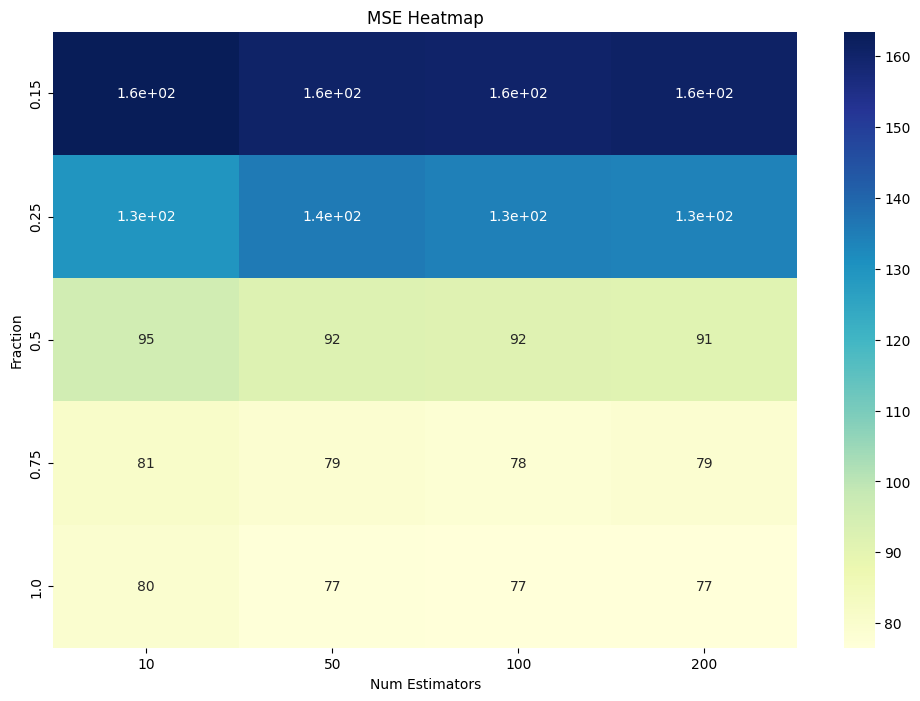

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

heatmap_data=[]

for i in reg_models:
    heatmap_data.append([i[1], i[2], i[3], i[0]])

heatmap_df = pd.DataFrame(heatmap_data, columns=['Model', 'Fraction', 'Num Estimators', 'Score'])
heatmap_df_pivot = heatmap_df.pivot_table(index='Fraction', columns='Num Estimators', values='Score', aggfunc=np.mean)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df_pivot, annot=True, cmap='YlGnBu')
plt.title('MSE Heatmap')
plt.show()


## Classifier

In [13]:
# Example usage for classification
from sklearn.tree import DecisionTreeClassifier

x_train,y_train,x_test,y_test,x_val,y_val = get_classifier_data()

models = []
# print(type(x_train))

model=MLPClassifier()
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for num_estimators in [10, 50, 100, 200]:
        for bootstrap in [True, False]:
            for voting in ['hard', 'soft']:
                bagging_clf = CustomBaggingClassifier(base_estimator=MLPClassifier, n_estimators=num_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting, random_state=42)
                bagging_clf.fit(x_train, y_train)
                predictions_clf = bagging_clf.predict(x_test)
                # y_test = np.argmax(y_test, axis=1)
                y_true=[]
                for i in y_test:
                    for j in range(len(i)):
                        if i[j]==1:
                            y_true.append(j)
                            break
                # print(y_true)
                for i in range(len(predictions_clf)):
                    # for j in range(len(predictions_clf[i])):
                    predictions_clf[i]=(int)(predictions_clf[i])
                # print(predictions_clf)
                score = accuracy_score(y_true, predictions_clf)
                # print("MLPClassifier", fraction, num_estimators, bootstrap, voting, score)
                models.append([score, "MLPClassifier", fraction, num_estimators, bootstrap, voting])
                # if score > best_score:
                #     best_score = score
                #     best_models.append(("MLPClassifier", fraction, num_estimators, bootstrap, voting))
# print("done")
model=LogisticRegression()
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for num_estimators in [10, 50, 100, 200]:
        for bootstrap in [True, False]:
            for voting in ['hard', 'soft']:
                bagging_clf = CustomBaggingClassifier(base_estimator=LogisticRegression, n_estimators=num_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting, random_state=42)
                bagging_clf.fit(x_train, y_train)
                predictions_clf = bagging_clf.predict(x_test)
                y_true=[]
                for i in y_test:
                    for j in range(len(i)):
                        if i[j]==1:
                            y_true.append(j)
                            break
                # print(y_true)
                # print(predictions_clf)
                for i in range(len(predictions_clf)):
                    # for j in range(len(predictions_clf[i])):
                    predictions_clf[i]=(int)(predictions_clf[i])
                score = accuracy_score(y_true, predictions_clf)
                # print("LinearRegression", fraction, num_estimators, bootstrap, voting, score)
                models.append([score, "LogisticRegression", fraction, num_estimators, bootstrap, voting])
                # if score > best_score:
                #     best_score = score
                #     best_models.append(("LinearRegression", fraction, num_estimators, bootstrap, voting))

model=DecisionTreeClassifier()
for fraction in [0.15, 0.25, 0.5, 0.75, 1.0]:
    for num_estimators in [10, 50, 100, 200]:
        for bootstrap in [True, False]:
            for voting in ['hard', 'soft']:
                bagging_clf = CustomBaggingClassifier(base_estimator=DecisionTreeClassifier, n_estimators=num_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting, random_state=42)
                bagging_clf.fit(x_train, y_train)
                predictions_clf = bagging_clf.predict(x_test)
                # y_true=[]
                # for i in y_test:
                #     for j in range(len(i)):
                #         if i[j]==1:
                #             y_true.append(j)
                #             break
                # print(y_true)
                for i in range(len(predictions_clf)):
                    for j in range(len(predictions_clf[i])):
                        predictions_clf[i][j]=(int)(predictions_clf[i][j])
                # print(predictions_clf)
                score = accuracy_score(y_test, predictions_clf)
                # print("DecisionTreeClassifier", fraction, num_estimators, bootstrap, voting, score)
                models.append([score, "DecisionTreeClassifier", fraction, num_estimators, bootstrap, voting])
                # if score > best_score:
                #     best_score = score
                #     best_models.append(("DecisionTreeClassifier", fraction, num_estimators, bootstrap, voting))

models.sort(reverse=True)

for i in models:
    print("Accuracy:",i[0],"\t Model:", i[1],"\t Number of Estimators:", i[3],"\t Bootstrap:",i[4],"\t Fraction:", i[2],"\t Voting:", i[5])


Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	 Number of Estimators: 200 	 Bootstrap: False 	 Fraction: 1.0 	 Voting: soft
Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	 Number of Estimators: 200 	 Bootstrap: False 	 Fraction: 1.0 	 Voting: hard
Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	 Number of Estimators: 100 	 Bootstrap: False 	 Fraction: 1.0 	 Voting: soft
Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	 Number of Estimators: 100 	 Bootstrap: False 	 Fraction: 1.0 	 Voting: hard
Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	 Number of Estimators: 50 	 Bootstrap: False 	 Fraction: 1.0 	 Voting: soft
Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	 Number of Estimators: 50 	 Bootstrap: False 	 Fraction: 1.0 	 Voting: hard
Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	 Number of Estimators: 10 	 Bootstrap: False 	 Fraction: 1.0 	 Voting: soft
Accuracy: 0.6571428571428571 	 Model: LogisticRegression 	

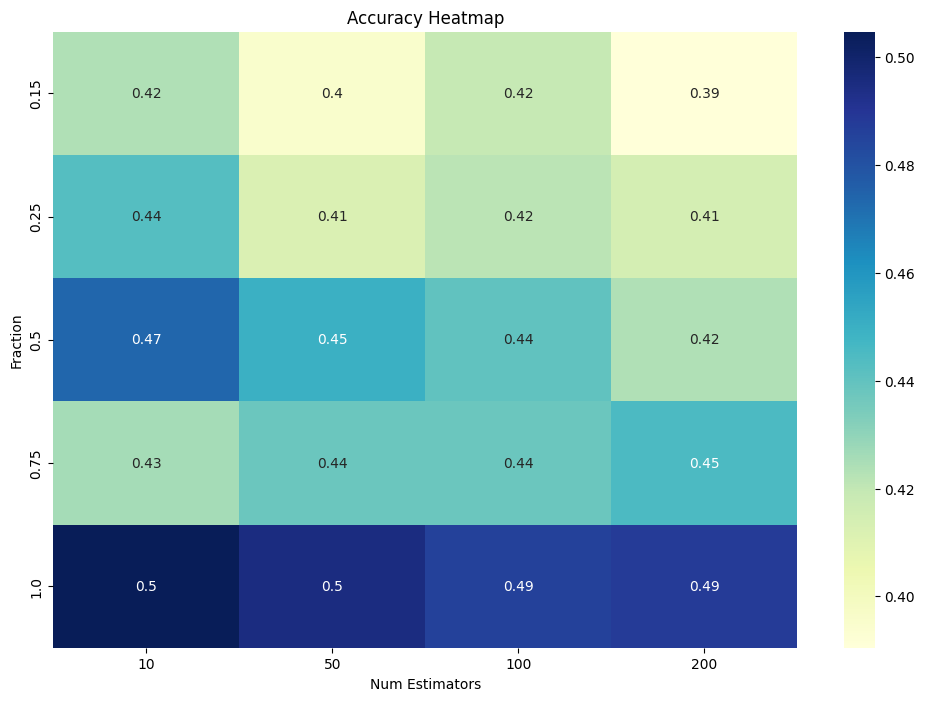

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

heatmap_data=[]

for i in models:
    heatmap_data.append([i[1], i[2], i[3], i[0]])

heatmap_df = pd.DataFrame(heatmap_data, columns=['Model', 'Fraction', 'Num Estimators', 'Score'])
heatmap_df_pivot = heatmap_df.pivot_table(index='Fraction', columns='Num Estimators', values='Score', aggfunc=np.mean)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df_pivot, annot=True, cmap='YlGnBu')
plt.title('Accuracy Heatmap')
plt.show()


## Comparison

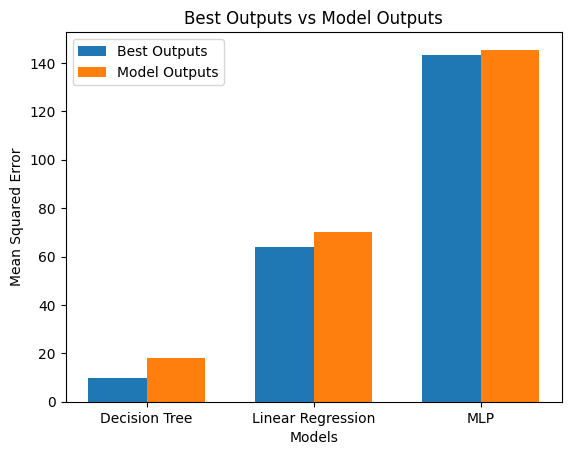

In [24]:
# Assuming models is a list of your base estimator classes

best_outputs=[9.78,63.93,143.22]
model_outputs=[]
models = [DecisionTreeRegressor(), LinearRegression(), MLPRegressor()]
x_train,y_train,x_test,y_test,x_val,y_val = get_regressor_data()

for base_model in models:
    base_model.fit(x_train, y_train)  # Assuming you have training data
    base_accuracy = mean_squared_error(y_test, base_model.predict(x_test)) # Assuming you have test data
    # print(base_accuracy)
    model_outputs.append(base_accuracy)
    # Get the corresponding ensemble model
    # ensemble_model = ensemble_models[base_model_name]

# Plotting side-by-side histograms
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(best_outputs))

bar1 = ax.bar(index, best_outputs, bar_width, label='Best Outputs')
bar2 = ax.bar([i + bar_width for i in index], model_outputs, bar_width, label='Model Outputs')

ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Best Outputs vs Model Outputs')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(['Decision Tree', 'Linear Regression', 'MLP'])
ax.legend()

plt.show()


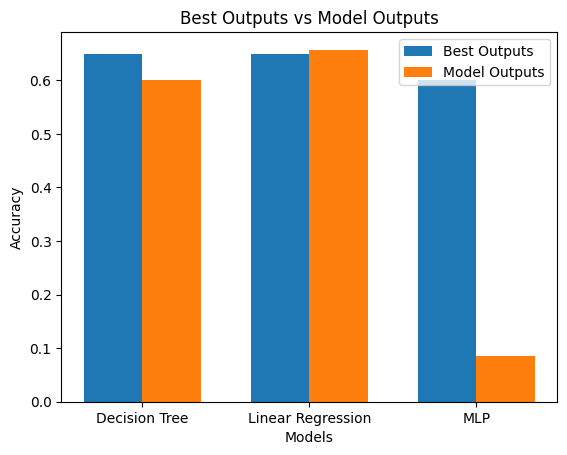

In [34]:
# Assuming models is a list of your base estimator classes

best_outputs=[0.65,0.65,0.60]
model_outputs=[]
models = [LogisticRegression(), MLPClassifier()]
x_train,y_train,x_test,y_test,x_val,y_val = get_classifier_data()

base_model=DecisionTreeClassifier()
base_model.fit(x_train, y_train)  # Assuming you have training data
preds=base_model.predict(x_test)
# for i in range(len(preds)):
#     print(preds[i])
    # preds[i]=int(preds[i])
base_accuracy = accuracy_score(y_test, preds) # Assuming you have test data
# print(base_accuracy)
model_outputs.append(base_accuracy)

for base_model in models:
    base_model.fit(x_train, y_train)  # Assuming you have training data
    preds=base_model.predict(x_test)
    y_true=[]
    for i in y_test:
        for j in range(len(i)):
            if i[j]==1:
                y_true.append(j)
                break
    # for i in range(len(preds)):
    #     print(preds[i])
        # preds[i]=int(preds[i])
    base_accuracy = accuracy_score(y_true, preds) # Assuming you have test data
    # print(base_accuracy)
    model_outputs.append(base_accuracy)
    # Get the corresponding ensemble model
    # ensemble_model = ensemble_models[base_model_name]

# Plotting side-by-side histograms
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(best_outputs))

bar1 = ax.bar(index, best_outputs, bar_width, label='Best Outputs')
bar2 = ax.bar([i + bar_width for i in index], model_outputs, bar_width, label='Model Outputs')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Best Outputs vs Model Outputs')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(['Decision Tree', 'Linear Regression', 'MLP'])
ax.legend()

plt.show()


# Stacking

## Classifier

In [51]:
from itertools import product
from sklearn.model_selection import KFold, train_test_split

class StackingClassifier:
    def __init__(self, base_classifiers, meta_classifiers, method):
        self.base_classifiers = base_classifiers
        self.meta_classifiers = meta_classifiers
        self.method = method

    def fit(self, X, y):
        for classifier in self.base_classifiers:
            classifier.fit(X, y)

        base_clf_preds = []
        for classifier in self.base_classifiers:
            preds = classifier.predict(X)
            # print(preds)
            if preds.ndim > 1:
                preds = preds[:, 1]
            # aligned_preds = preds.reshape(-1, 1)[:min(len(preds), len(y))]  # Ensure predictions match the target length
            aligned_preds = preds.reshape(-1, 1)
            
            # print(aligned_preds)
            base_clf_preds.append(aligned_preds)

        stacked_X = np.hstack(base_clf_preds)

        if self.method == 'stacking':
            kfold = KFold(n_splits=5, shuffle=True, random_state=42)
            stacked_features = []
            for train_index, test_index in kfold.split(X):
                X_train, X_test = stacked_X[train_index], stacked_X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                features = []
                for classifier in self.meta_classifiers:
                    classifier.fit(X_train, y_train)
                    preds = classifier.predict(X_test).reshape(-1, 1)[:min(len(X_test), len(y_test))]
                    # preds = classifier.predict(X_test)
                    # preds = preds[:, 1]
                    aligned_preds = preds.reshape(-1, 1)
                    features.append(aligned_preds)
                stacked_features.append(np.hstack(features))

            self.stacked_X = np.vstack(stacked_features)

        elif self.method == 'blending':
            X_train_base, X_meta, y_train_base, y_meta = train_test_split(stacked_X, y, test_size=0.2, random_state=42)
            for classifier in self.meta_classifiers:
                classifier.fit(X_train_base, y_train_base)
            self.stacked_X = X_meta

    def predict(self, X):
        base_clf_preds = []
        for classifier in self.base_classifiers:
            preds = classifier.predict(X)
            if preds.ndim > 1:
                preds = preds[:, 1]
            aligned_preds = preds.reshape(-1, 1)[:min(len(preds), len(X))]
            base_clf_preds.append(aligned_preds)

        stacked_X = np.hstack(base_clf_preds)

        final_predictions = []
        for classifier in self.meta_classifiers:
            preds = classifier.predict(stacked_X).reshape(-1, 1)[:min(len(stacked_X), len(X))]
            # preds = classifier.predict(stacked_X)
            # preds = preds[:, 1]
            aligned_preds = preds.reshape(-1, 1)
            final_predictions.append(aligned_preds)

        return np.mean(np.hstack(final_predictions), axis=1)



In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

level_0_estimators=[DecisionTreeClassifier(), LogisticRegression(), MLPClassifier()]
level_1_estimators=[LogisticRegression(), DecisionTreeClassifier()]

x_train,y_train,x_test,y_test,x_val,y_val = get_classifier_data()
# print(y_train)
for level_0_estimator in level_0_estimators:
    for method in ["stacking", "blending"]:
        ensemble = StackingClassifier(level_0_estimator, level_1_estimators, method=method)
        ensemble.fit(x_train, y_train)
        predictions = ensemble.predict(x_test)
        # print(accuracy_score(y_test, predictions))
        y_true=[]
        for i in y_test:
            for j in range(len(i)):
                if i[j]==1:
                    y_true.append(j)
                    break
        # print(y_true)
        for i in range(len(predictions)):
            # for j in range(len(predictions_clf[i])):
            predictions[i]=(int)(predictions[i])
        # print(predictions)
        print(method, accuracy_score(y_true, predictions))

stacking 0.4739 
bagging 0.5749


## Regressor

In [42]:
from itertools import product
from sklearn.model_selection import KFold, train_test_split

class StackingRegressor:
    def __init__(self, base_regressors, meta_regressors, method='stacking'):
        self.base_regressors = base_regressors
        self.meta_regressors = meta_regressors
        self.method = method

    def fit(self, X, y):
        for regressor in self.base_regressors:
            regressor.fit(X, y)

        base_reg_preds = []
        for regressor in self.base_regressors:
            preds = regressor.predict(X)
            base_reg_preds.append(preds.reshape(-1, 1))

        stacked_X = np.hstack(base_reg_preds)

        if self.method == 'stacking':
            kfold = KFold(n_splits=5, shuffle=True, random_state=42)
            stacked_features = []
            for train_index, test_index in kfold.split(X):
                X_train, X_test = stacked_X[train_index], stacked_X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                features = []
                for regressor in self.meta_regressors:
                    regressor.fit(X_train, y_train)
                    preds = regressor.predict(X_test).reshape(-1, 1)
                    features.append(preds)
                stacked_features.append(np.hstack(features))

            self.stacked_X = np.vstack(stacked_features)

        elif self.method == 'blending':
            X_train_base, X_meta, y_train_base, y_meta = train_test_split(stacked_X, y, test_size=0.2, random_state=42)
            for regressor in self.meta_regressors:
                regressor.fit(X_train_base, y_train_base)
            self.stacked_X = X_meta

    def predict(self, X):
        base_reg_preds = []
        for regressor in self.base_regressors:
            preds = regressor.predict(X).reshape(-1, 1)
            base_reg_preds.append(preds)

        stacked_X = np.hstack(base_reg_preds)

        final_predictions = []
        for regressor in self.meta_regressors:
            preds = regressor.predict(stacked_X).reshape(-1, 1)
            final_predictions.append(preds)

        return np.mean(np.hstack(final_predictions), axis=1)



In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

level_0_estimators=[DecisionTreeRegressor(), LinearRegression(), MLPRegressor()]
level_1_estimators=[LinearRegression(), DecisionTreeRegressor()]

x_train,y_train,x_test,y_test,x_val,y_val = get_regressor_data()

for method in ["stacking", "blending"]:
    ensemble = StackingRegressor(level_0_estimators, level_1_estimators, method=method)
    ensemble.fit(x_train, y_train)
    predictions = ensemble.predict(x_test)
    print(method, mean_squared_error(y_test, predictions))

stacking 18.8853114339985
blending 18.851250304223225


## Comparison

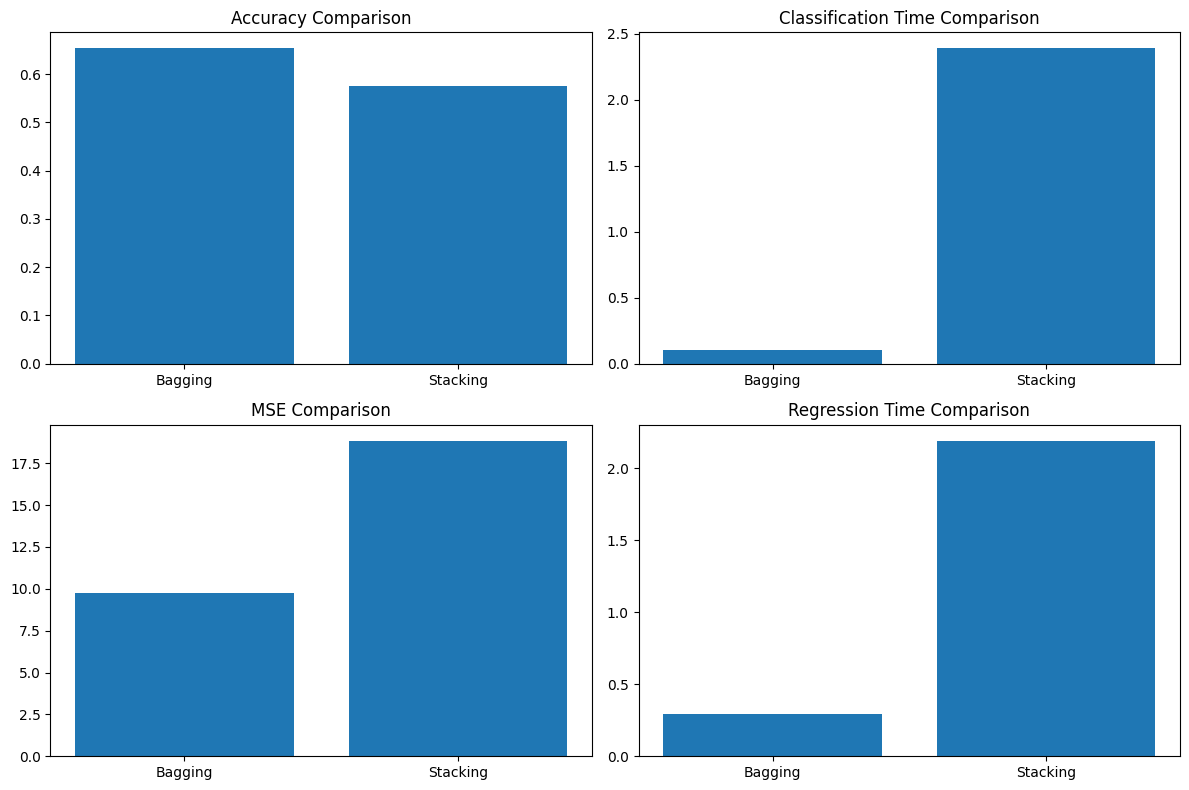

In [61]:
import matplotlib.pyplot as plt

bagging_accuracy=0.6537
stacking_accuracy=0.5749

bagging_time_classif=0.103
stacking_time_classif=2.39

bagging_mse=9.78
stacking_mse=18.85

bagging_time_reg=0.29
stacking_time_reg=2.19

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy
axs[0, 0].bar(['Bagging', 'Stacking'], [bagging_accuracy, stacking_accuracy])
axs[0, 0].set_title('Accuracy Comparison')

# Classification Time
axs[0, 1].bar(['Bagging', 'Stacking'], [bagging_time_classif, stacking_time_classif])
axs[0, 1].set_title('Classification Time Comparison')

# MSE in Classification
axs[1, 0].bar(['Bagging', 'Stacking'], [bagging_mse, stacking_mse])
axs[1, 0].set_title('MSE Comparison')

# Regression Time
axs[1, 1].bar(['Bagging', 'Stacking'], [bagging_time_reg, stacking_time_reg])
axs[1, 1].set_title('Regression Time Comparison')

plt.tight_layout()
plt.show()